In [26]:
import numpy as np
import math
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load your dataset
auto = pd.read_csv('adverts.csv')
auto.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [28]:
# Drop unneeded 
auto.drop(columns=["public_reference", "standard_colour"], inplace=True)

In [29]:
# Find all columns with a small number of unique entries (for one hot encoding)
for col in auto.columns:
    if len(auto[col].unique()) < 15:
        print(col, auto[col].unique())

vehicle_condition ['NEW' 'USED']
crossover_car_and_van [False  True]
fuel_type ['Petrol Plug-in Hybrid' 'Diesel' 'Petrol' 'Diesel Hybrid' 'Petrol Hybrid'
 'Electric' 'Diesel Plug-in Hybrid' nan 'Bi Fuel' 'Natural Gas']


In [30]:
for f_type in auto["fuel_type"].unique():
    count = len(auto.loc[auto["fuel_type"] == f_type])
    print(f"{f_type} has {count} entries")

Petrol Plug-in Hybrid has 6160 entries
Diesel has 158120 entries
Petrol has 216929 entries
Diesel Hybrid has 1403 entries
Petrol Hybrid has 13602 entries
Electric has 4783 entries
Diesel Plug-in Hybrid has 185 entries
nan has 0 entries
Bi Fuel has 221 entries
Natural Gas has 1 entries


In [31]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

for col in ["vehicle_condition"]:
    encoded_features = one_hot_encoder.fit_transform(auto[[col]])
    encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out([col]))
    auto = pd.concat([auto.drop(col, axis=1), encoded_df], axis=1)
auto

,mileage,reg_code,standard_make,standard_model,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,vehicle_condition_NEW,vehicle_condition_USED
0,0.0,NaN,Volvo,XC90,NaN,73970,SUV,False,Petrol Plug-in Hybrid,1.0,0.0
1,108230.0,61,Jaguar,XF,2011.0,7000,Saloon,False,Diesel,0.0,1.0
2,7800.0,17,SKODA,Yeti,2017.0,14000,SUV,False,Petrol,0.0,1.0
3,45000.0,16,Vauxhall,Mokka,2016.0,7995,Hatchback,False,Diesel,0.0,1.0
4,64000.0,64,Land Rover,Range Rover Sport,2015.0,26995,SUV,False,Diesel,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,69,Peugeot,208,2019.0,10595,Hatchback,False,Petrol,0.0,1.0
402001,110000.0,59,Peugeot,107,2009.0,2000,Hatchback,False,Petrol,0.0,1.0
402002,52760.0,62,Nissan,Qashqai,2012.0,7250,SUV,False,Petrol,0.0,1.0
402003,10250.0,65,Abarth,595,2015.0,11490,Hatchback,False,Petrol,0.0,1.0


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ["standard_make", "standard_model", "body_type", "fuel_type"]:
    auto[column] = label_encoder.fit_transform(auto[column])
auto

,mileage,reg_code,standard_make,standard_model,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,vehicle_condition_NEW,vehicle_condition_USED
0,0.0,NaN,106,1107,NaN,73970,13,False,8,1.0,0.0
1,108230.0,61,47,1110,2011.0,7000,14,False,1,0.0,1.0
2,7800.0,17,91,1130,2017.0,14000,13,False,6,0.0,1.0
3,45000.0,16,104,702,2016.0,7995,7,False,1,0.0,1.0
4,64000.0,64,54,833,2015.0,26995,13,False,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,69,78,41,2019.0,10595,7,False,6,0.0,1.0
402001,110000.0,59,78,6,2009.0,2000,7,False,6,0.0,1.0
402002,52760.0,62,72,798,2012.0,7250,13,False,6,0.0,1.0
402003,10250.0,65,2,126,2015.0,11490,7,False,6,0.0,1.0


In [ ]:
# auto["year_of_registration"].mask(auto["year_of_registration"] < 1905, inplace=True)
# auto.loc[auto["year_of_registration"]<1905]

,mileage,reg_code,standard_make,standard_model,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,vehicle_condition_NEW,vehicle_condition_USED
59010,14000.0,07,Toyota,Prius,1007.0,7000,Hatchback,False,Petrol Hybrid,0.0,1.0
69516,96659.0,65,Audi,A4 Avant,1515.0,10385,Estate,False,Diesel,0.0,1.0
84501,37771.0,63,Smart,fortwo,1063.0,4785,Coupe,False,Petrol,0.0,1.0
114737,30000.0,59,Toyota,AYGO,1009.0,4695,Hatchback,False,Petrol,0.0,1.0
120858,27200.0,66,MINI,Clubman,1016.0,18990,Estate,False,Diesel,0.0,1.0
190556,58470.0,10,Fiat,Punto Evo,1010.0,3785,Hatchback,False,Petrol,0.0,1.0
199830,23000.0,59,MINI,Hatch,1009.0,5995,Hatchback,False,Petrol,0.0,1.0
199987,104000.0,08,BMW,1 Series,1008.0,4395,Convertible,False,Petrol,0.0,1.0
201616,8600.0,68,BMW,M2,1018.0,41990,Coupe,False,Petrol,0.0,1.0
201626,69346.0,64,Mazda,Mazda3,999.0,8795,Saloon,False,Petrol,0.0,1.0


In [14]:
auto["year_of_registration"].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

In [7]:
for col in auto.columns:
    print(f"{col} has {auto[col].isnull().sum()} null values")

mileage has 127 null values
reg_code has 31857 null values
standard_make has 0 null values
standard_model has 0 null values
vehicle_condition has 0 null values
year_of_registration has 33328 null values
price has 0 null values
body_type has 837 null values
crossover_car_and_van has 0 null values
fuel_type has 601 null values


## Ideas

Mileage - Can be estimated based on the age and type of the car

Reg Codes - Can be dropped once the info has been added to year_of_reg

Year of reg - Get some from reg_code, other can be estimated from either: median of all values or imputed from similar cars in the dataset. 

Body type - Impute from data, manual lookup or the highly cursed: "just call chatgpt lmao"

Fuel type - Just assume it is petrol as that is by far the most common. <--- Check that with some analysis (maybe it differs for some brands?)

In [8]:
# Seems unlikely that a 2013 Vauxhall Astra with exactly 999999.0 miles on it

auto["miles_per_day"] = auto["mileage"] / ((2020 -auto["year_of_registration"]) * 365)

auto.loc[(auto["miles_per_day"] > 300) & (auto["miles_per_day"] < np.inf)]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
14337,114730.0,69,Land Rover,Discovery,USED,2019.0,52844,SUV,False,Diesel,314.328767
43974,999999.0,63,Vauxhall,Astra,USED,2013.0,9999,Hatchback,False,Diesel,391.389041
115277,740000.0,14,Volvo,XC90,USED,2014.0,14795,SUV,False,Diesel,337.899543
117319,242000.0,19,Honda,Civic,USED,2019.0,15500,Hatchback,False,Diesel,663.013699
131508,788072.0,68,MINI,Countryman,USED,2018.0,22875,SUV,False,Petrol,1079.550685
281160,195668.0,P,Buick,Riviera,USED,2019.0,7500,Saloon,False,Petrol,536.076712


In [9]:
# Seems unlikely that there's a 2012 Fiat 500 kicking about with 0 miles on it being traded in 
auto.loc[(auto["mileage"] < 10) & (auto["vehicle_condition"] != "NEW") & (auto["year_of_registration"] < 2018)].head(10)

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
1656,0.0,13,Vauxhall,Insignia,USED,2013.0,2975,Hatchback,False,Diesel,0.0
2754,0.0,63,Audi,A1,USED,2013.0,8000,Hatchback,False,Diesel,0.0
8677,0.0,D,Porsche,911,USED,1987.0,89995,Convertible,False,Petrol,0.0
17265,0.0,65,Renault,Kadjar,USED,2015.0,10699,SUV,False,Diesel,0.0
52682,0.0,61,BMW,X6,USED,2011.0,14000,SUV,False,Diesel,0.0
67889,0.0,15,Kia,Venga,USED,2015.0,6699,MPV,False,Petrol,0.0
77011,0.0,W,Porsche,911,USED,1981.0,130000,Coupe,False,Petrol,0.0
92881,0.0,V,Honda,Civic,USED,1999.0,1496,Hatchback,False,Petrol,0.0
122534,0.0,C,Land Rover,Defender 110,USED,1986.0,89995,SUV,False,Petrol,0.0
132740,0.0,66,Volkswagen,up!,USED,2016.0,7995,Hatchback,False,Petrol,0.0


In [10]:
auto.loc[(auto["mileage"] < 10) & (auto["vehicle_condition"] == "USED") & (auto["year_of_registration"] < 2018)]["mileage"].replace(0, np.nan, inplace=True)

In [11]:
auto.loc[auto["vehicle_condition"] == "USED"]["mileage"].mode()

0    10.0
Name: mileage, dtype: float64

<Axes: xlabel='mileage', ylabel='Count'>

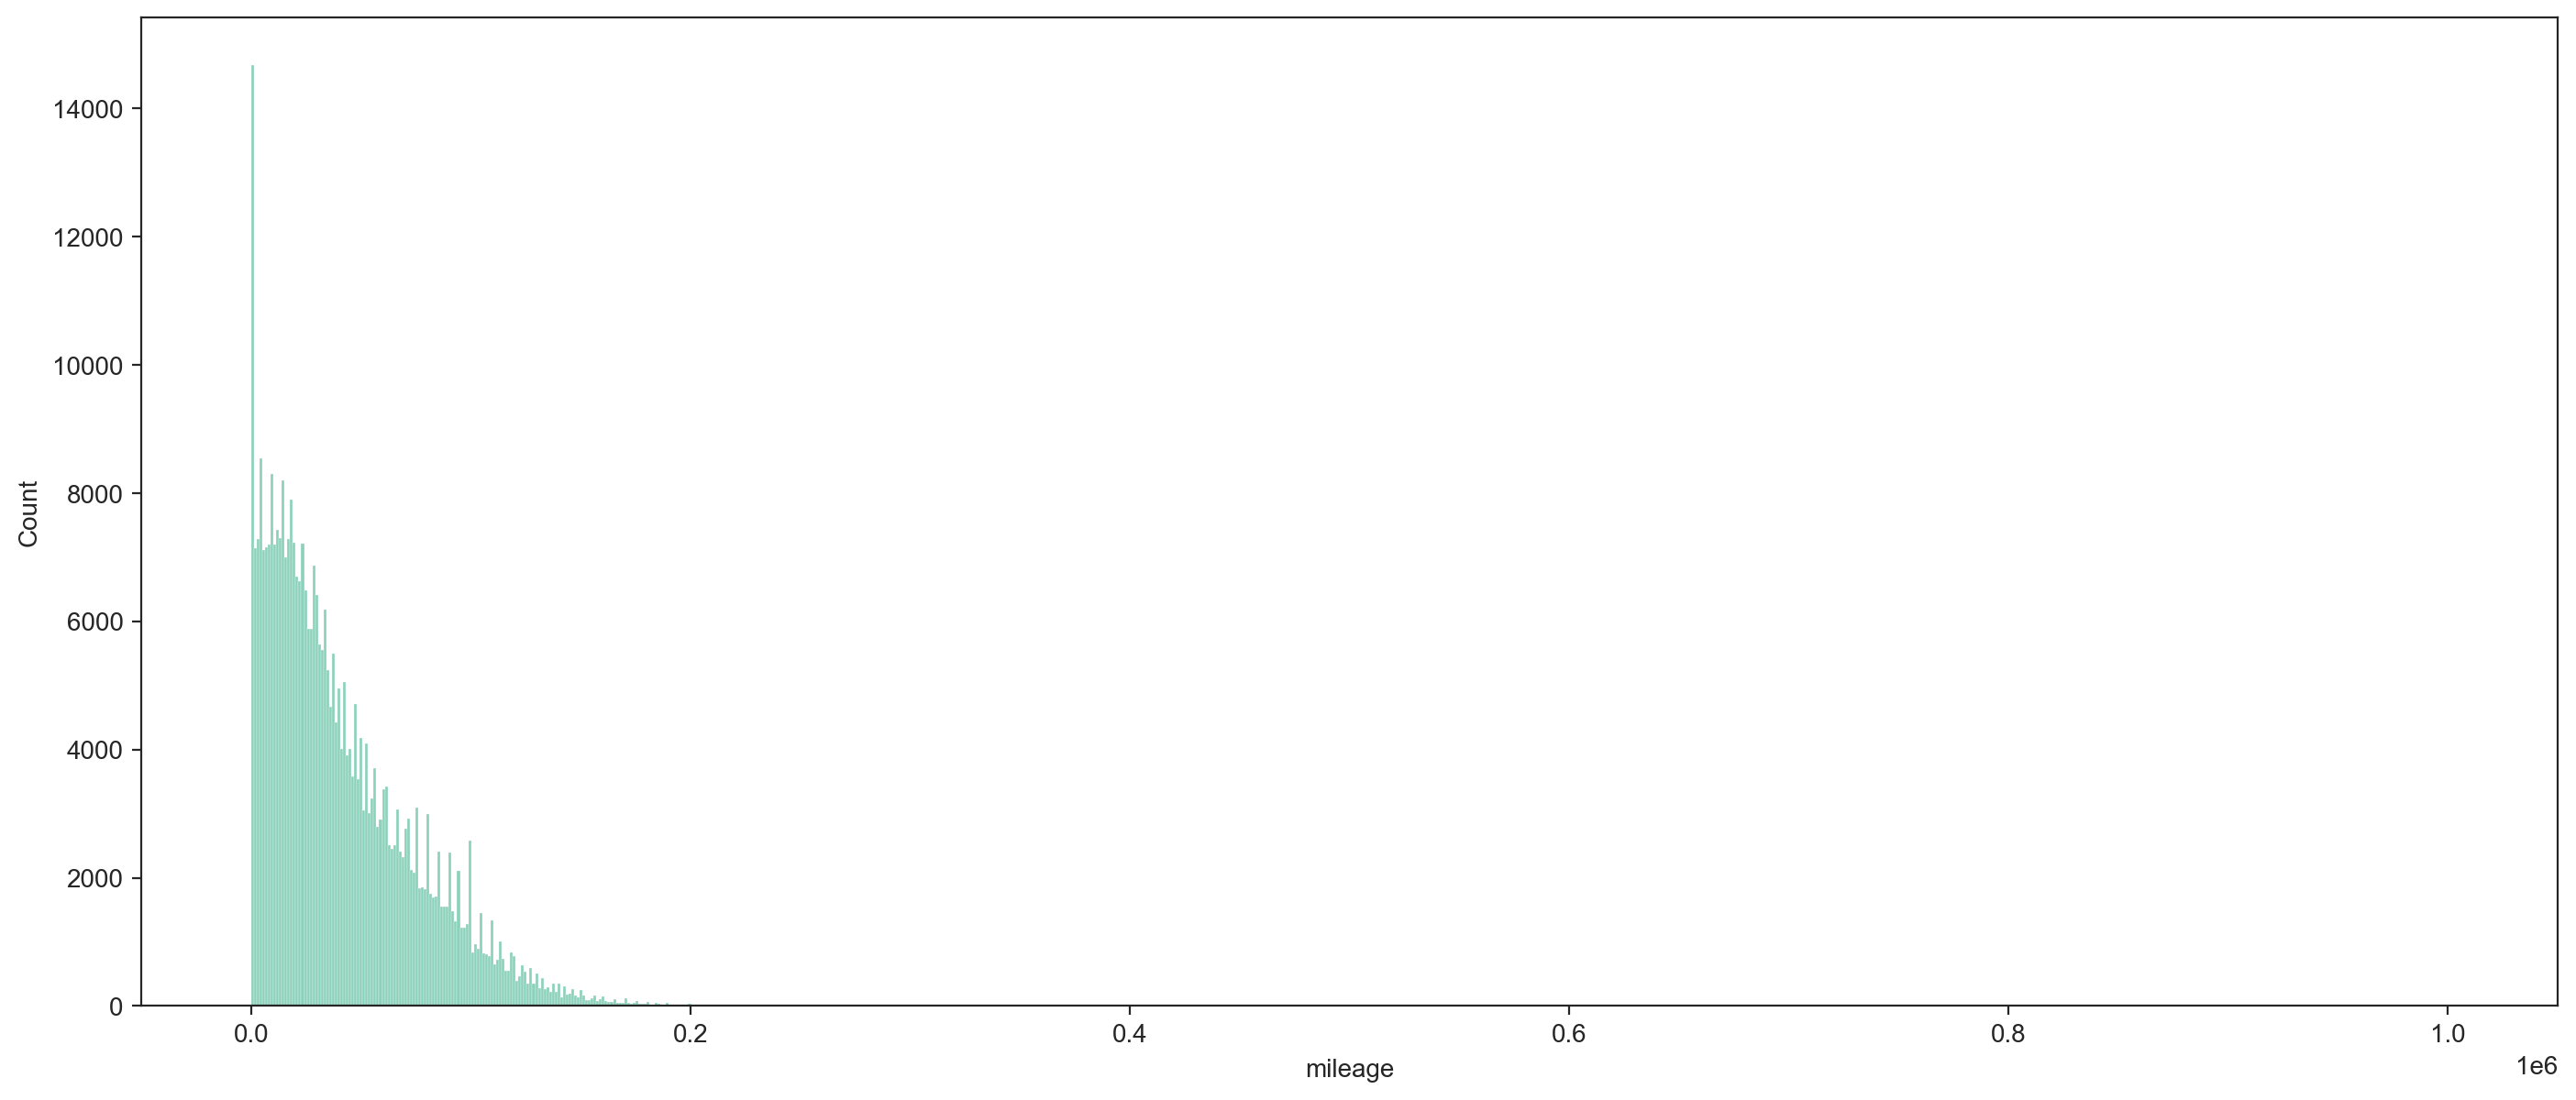

In [12]:
sns.histplot(auto.loc[auto["vehicle_condition"] == "USED"], x="mileage")

In [13]:
# Check that all new cars have the year of reg filled as 2020
new_no_year = auto.loc[auto["year_of_registration"].isna() & (auto["vehicle_condition"] == "NEW")]
new_no_year["year_of_registration"] = new_no_year["year_of_registration"].map(lambda f: 2020)
auto.loc[auto["year_of_registration"].isna() & (auto["vehicle_condition"] == "NEW")] = new_no_year

In [14]:
auto["reg_code"].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [15]:
auto.loc[auto["year_of_registration"].isnull() & auto["reg_code"].notnull()]

,mileage,reg_code,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
54,30000.0,18,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol,NaN
83,42847.0,61,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol,NaN
865,43130.0,66,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel,NaN
968,63369.0,17,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel,NaN
1256,18715.0,68,Volvo,V40,USED,NaN,16950,NaN,False,Petrol,NaN
...,...,...,...,...,...,...,...,...,...,...,...
400336,66287.0,63,Vauxhall,Astra GTC,USED,NaN,8400,Coupe,False,Petrol,NaN
400725,45.0,20,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel,NaN
401314,12522.0,67,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol,NaN
401323,46000.0,13,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel,NaN


In [16]:
def reg_to_year(reg_code):
    try:
        if math.isnan(reg_code): return np.nan
        reg_code = int(reg_code)
    except:
        letters = "ABCDEFGHJKLMNPRSTXYZ"
        if reg_code not in letters: return np.nan
        if reg_code == "V":
            return 1999
        if reg_code == "W":
            return 2000
        return 1983 + letters.find(reg_code)
    
    if reg_code > 71: return np.nan

    if reg_code < 50:
        if reg_code > 20: return np.nan
        return reg_code + 2000
    
    return reg_code + 1950

auto["reg_code"] = auto["reg_code"].map(reg_to_year)
auto["year_of_registration"].fillna(auto["reg_code"], inplace=True)
auto.drop(columns="reg_code", inplace=True)
auto["year_of_registration"].unique()

array([2020., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003.,   nan, 2006., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1957., 1963., 1954.,
       1975., 1955., 1960., 1956., 1959., 1909., 1934., 1958., 1950.,
       1952.])

In [17]:
len(auto.loc[auto["year_of_registration"].isnull()])

2035

<Axes: xlabel='price', ylabel='Count'>

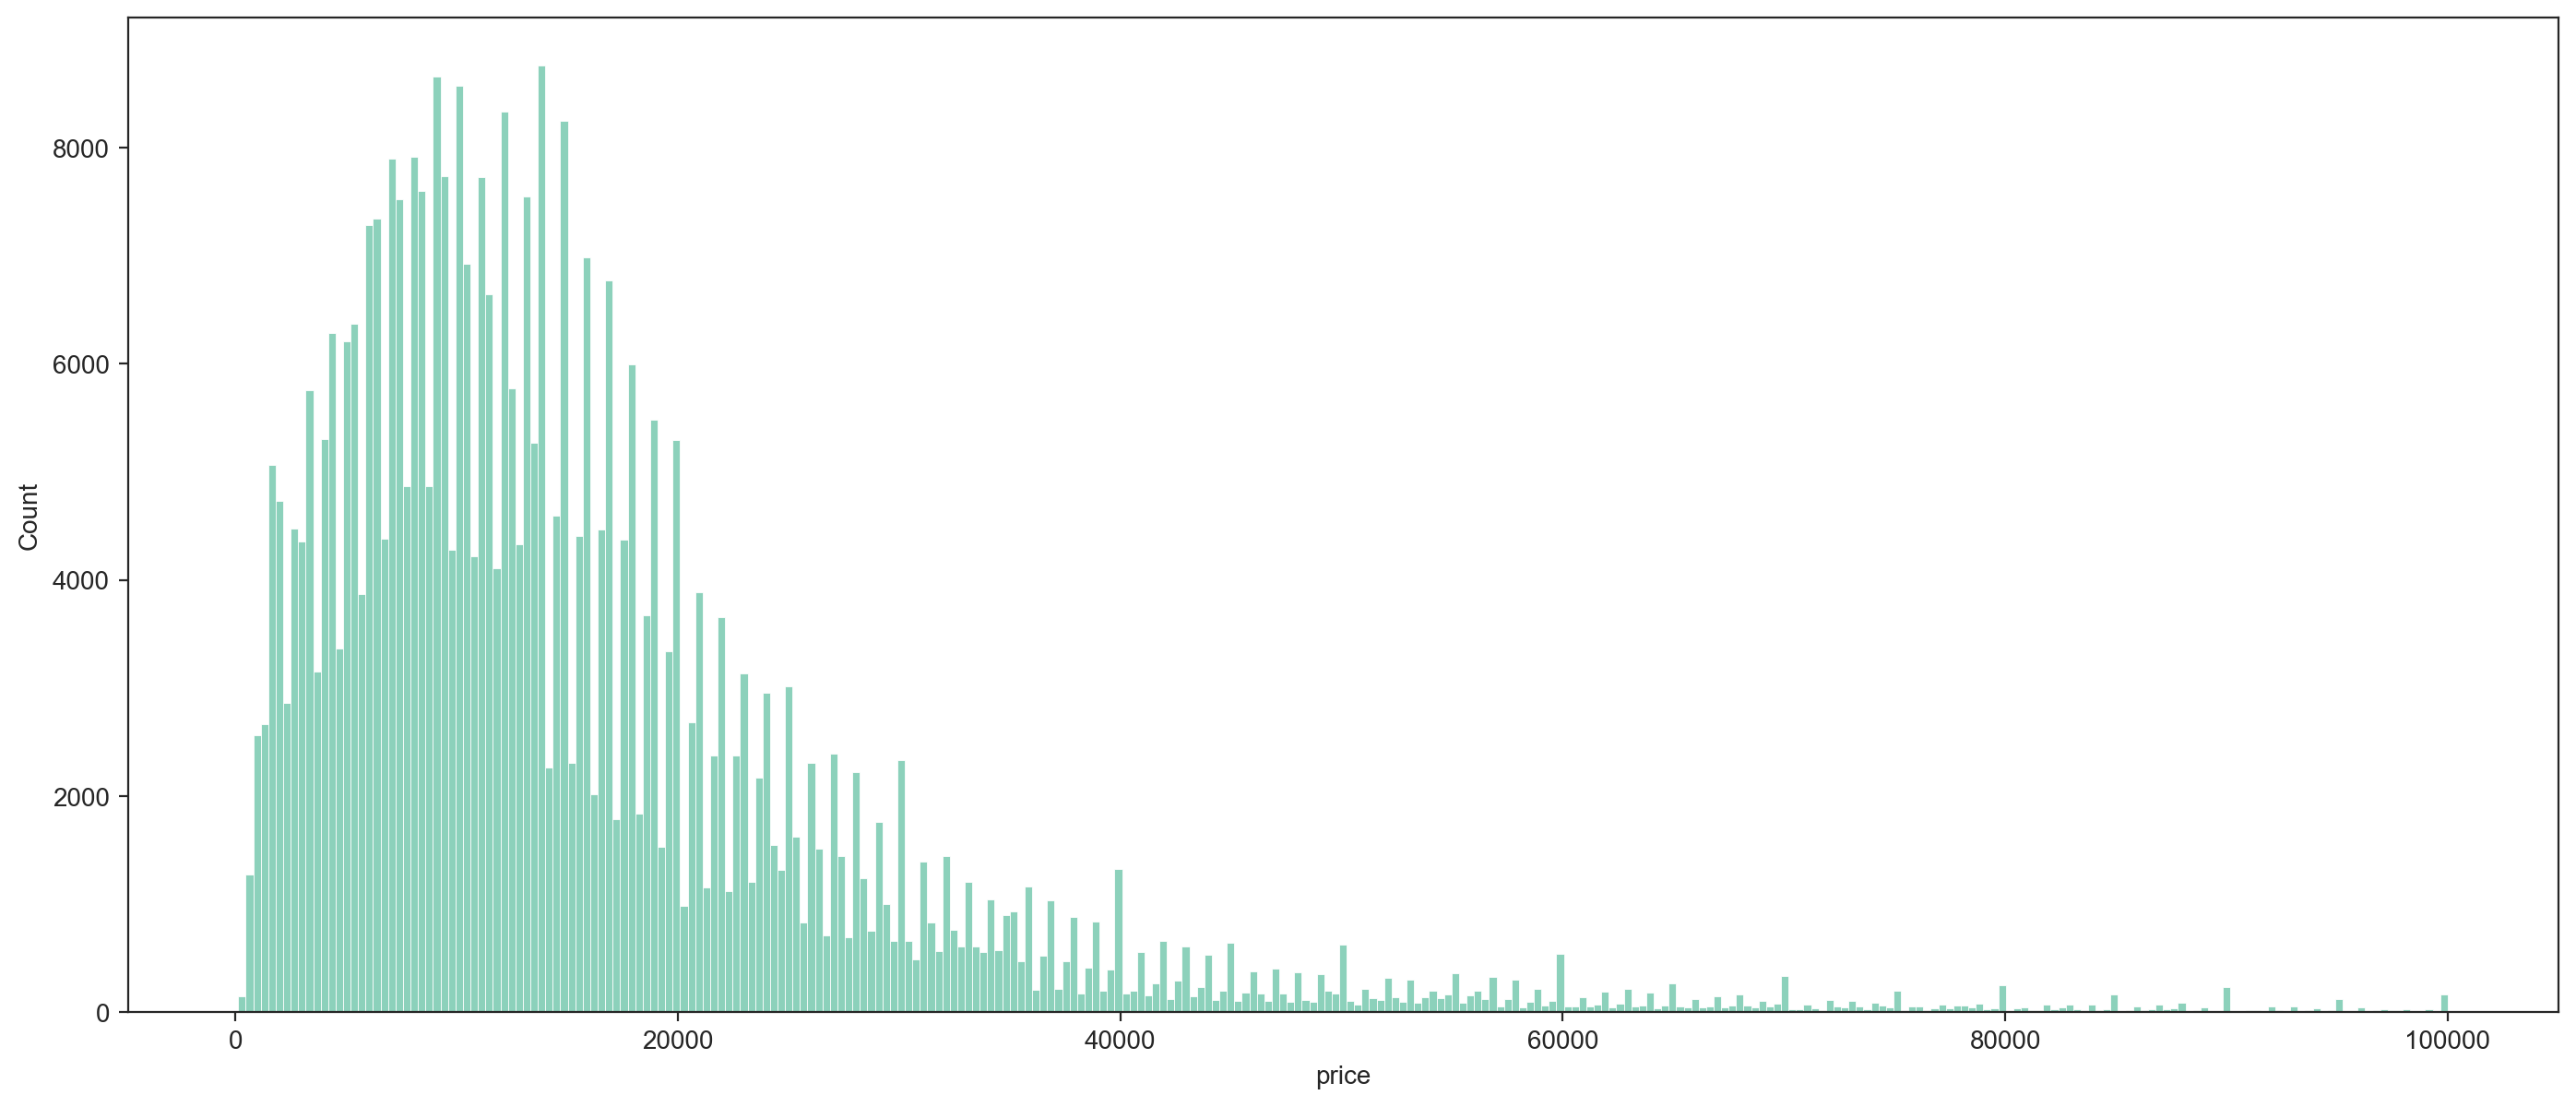

In [18]:
sns.histplot(auto.loc[auto["price"] < 1e5], x="price")

In [19]:
len(auto["standard_model"].unique())

1168

In [20]:
auto.loc[auto["price"]>1e6]

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
21997,2180.0,Bugatti,Veyron,USED,2010.0,1590000,Convertible,False,Petrol,0.597260
51741,4400.0,Bugatti,Veyron,USED,2014.0,2850000,Coupe,False,Petrol,2.009132
62571,2200.0,Porsche,918,USED,2016.0,1099950,Convertible,False,Petrol Hybrid,1.506849
64910,189.0,McLaren,P1,USED,NaN,2695000,Coupe,False,Petrol Plug-in Hybrid,NaN
72681,475.0,Ferrari,LaFerrari,USED,2015.0,2299950,Coupe,False,Petrol,0.260274
94033,1900.0,Pagani,Huayra,USED,NaN,2400000,Convertible,False,Petrol,NaN
103974,10895.0,Bugatti,Veyron,USED,2016.0,1699995,Coupe,False,NaN,7.462329
141833,87450.0,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol,NaN
145819,6170.0,Ferrari,LaFerrari,USED,2013.0,2150000,Coupe,False,Petrol Plug-in Hybrid,2.414873
147188,100.0,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol,NaN


In [21]:
# Cannot use any data where the price is not valid
auto = auto.loc[auto['price'] != 9999999]

In [22]:
auto.loc[auto["crossover_car_and_van"] == True]

,mileage,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,miles_per_day
53,7066.0,Volkswagen,Caddy Life,USED,2017.0,17975,MPV,True,Petrol,6.452968
954,2879.0,Nissan,Navara,USED,2020.0,29990,Pickup,True,Diesel,inf
1290,281500.0,Volkswagen,Caravelle,USED,2006.0,7650,MPV,True,Diesel,55.088063
1316,151000.0,Volkswagen,Transporter Sportline,USED,2009.0,13000,Combi Van,True,Diesel,37.608966
1338,0.0,SsangYong,Musso,NEW,2020.0,25631,Pickup,True,Diesel,NaN
...,...,...,...,...,...,...,...,...,...,...
401432,65000.0,Land Rover,Defender 90,USED,2012.0,39950,SUV,True,Diesel,22.260274
401501,4809.0,Volkswagen,Amarok,USED,2020.0,38995,Pickup,True,Diesel,inf
401513,32000.0,Land Rover,Defender 90,USED,2014.0,36800,SUV,True,Diesel,14.611872
401733,40498.0,Mercedes-Benz,V Class,USED,2016.0,33000,MPV,True,Diesel,27.738356


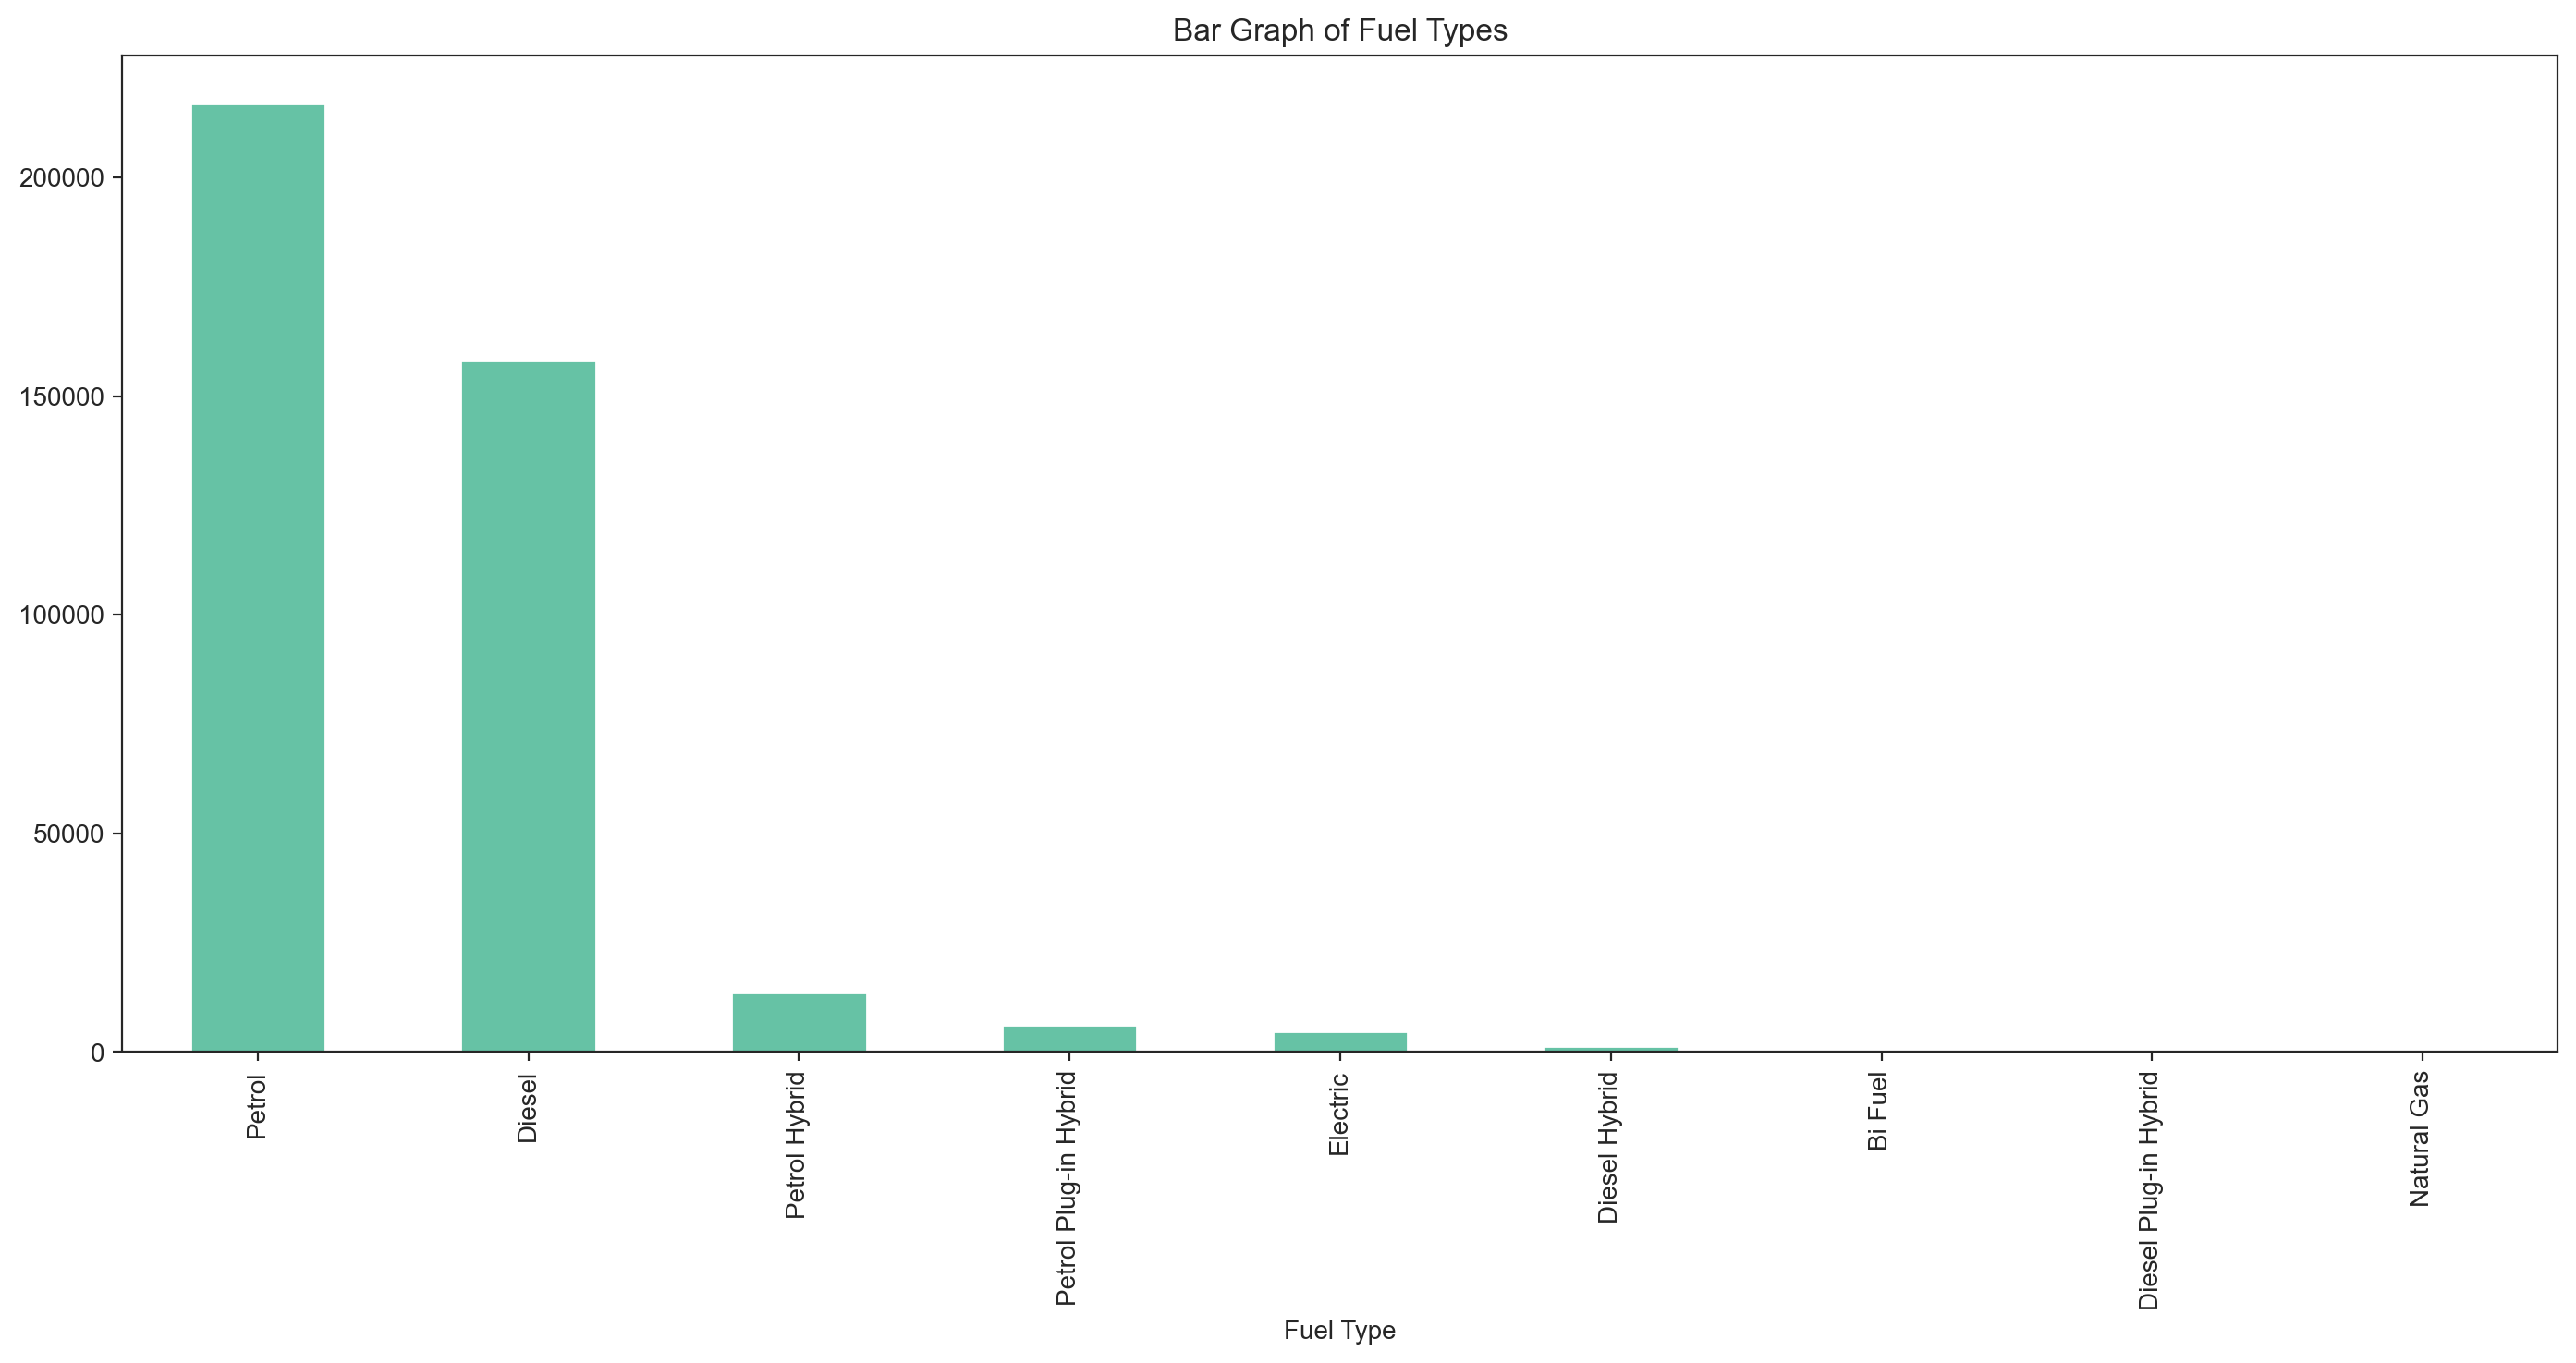

In [23]:
axes = auto['fuel_type'].value_counts(sort=True)[:40].plot.bar()
axes.set_title("Bar Graph of Fuel Types");
axes.set_xlabel("Fuel Type");

In [24]:
num_crossover = len(auto.loc[auto["crossover_car_and_van"]==True])
num_normal = len(auto.loc[auto["crossover_car_and_van"]==False])
print("Crossover:", num_crossover, "Normal:", num_normal)

Crossover: 1795 Normal: 400204


In [25]:
for col in auto.columns:
    print(col, auto[col].unique()[:20])

mileage [0.00000e+00 1.08230e+05 7.80000e+03 4.50000e+04 6.40000e+04 1.60000e+04
 2.40750e+04 9.90000e+04 1.11236e+05 9.50000e+03 7.70000e+04 2.44870e+04
 4.76500e+03 1.82140e+04 3.15340e+04 3.86030e+04 5.20230e+04 5.00000e+00
 2.95000e+04 3.53000e+04]
standard_make ['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Mercedes-Benz'
 'Volkswagen' 'Peugeot' 'SEAT' 'MINI' 'BMW' 'Nissan' 'Mitsubishi'
 'Ferrari' 'Citroen' 'Toyota' 'Kia' 'Renault' 'Fiat']
standard_model ['XC90' 'XF' 'Yeti' 'Mokka' 'Range Rover Sport' 'S5' 'Viva' 'Range Rover'
 'S Class' 'Passat' '208' 'Octavia' 'Leon' 'Hatch' '2 Series Gran Tourer'
 'Golf' 'X-Trail' 'C Class' 'T-Cross' 'Corsa']
vehicle_condition ['NEW' 'USED']
year_of_registration [2020. 2011. 2017. 2016. 2015. 2013. 2008. 2019. 2010. 2012. 2018. 2009.
 1984. 2014. 2003.   nan 2006. 2005. 2000. 2002.]
price [73970  7000 14000  7995 26995 29000  5861 24475  6995 79995  4499  8795
 16990 14290 19000 16000 13500 27595  9495 25000]
body_type ['SUV' 'Saloon

In [26]:
def map_to_int(str_list):
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict

# Map string values to integers
for column in ["standard_make", "reg_code", "body_type", "fuel_type", "crossover_car_and_van", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())
    auto[column] = auto[column].replace(to_replace=mapping_dict)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/hal/miniforge3/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'reg_code'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/hal/miniforge3/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/f8/84hgc_1104zb3d1sn2z03zsc0000gn/T/ipykernel_16468/1214070559.py", line 9,

In [ ]:
for col in auto.columns:
    print(f"{col} has {auto[col].isnull().sum()} null values")

mileage has 127 null values
reg_code has 399494 null values
standard_make has 0 null values
standard_model has 0 null values
vehicle_condition has 0 null values
year_of_registration has 2029 null values
price has 0 null values
body_type has 837 null values
crossover_car_and_van has 0 null values
fuel_type has 601 null values
miles_per_day has 33725 null values


In [ ]:
auto.isnull().values.any()

np.True_

### Split data for fitting

In [28]:
from sklearn.model_selection import train_test_split

X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression

### KNN Regressor